In [1]:
#Logistic regression
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
#generating data set
x,  y = make_classification(
    n_samples = 300,
    n_features = 1,
    n_classes = 2,
    n_clusters_per_class = 1,
    flip_y = 0.03,
    n_informative = 1,
    n_redundant = 0,
    n_repeated = 0
)

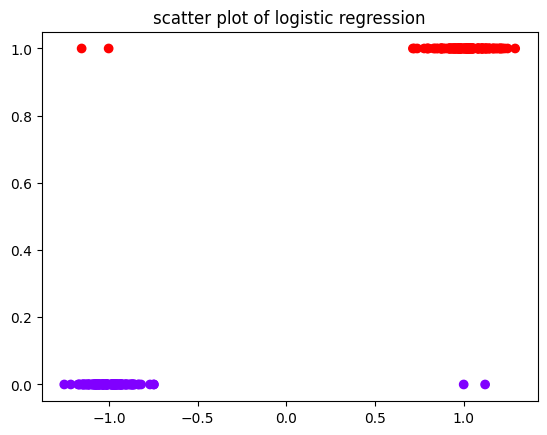

In [3]:
#creating scatter plot
plt.scatter(x, y, c=y, cmap ='rainbow')
plt.title('scatter plot of logistic regression')
plt.show()

In [4]:
#split the dateset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =1)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [6]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[3.31014144]]
[0.01400754]


In [7]:
y_pred = log_reg.predict(x_test)

In [8]:
confusion_matrix(y_test, y_pred)

array([[74,  1],
       [ 1, 74]])

In [9]:
df=pd.DataFrame({'x=actual':y_test, 'predicted': y_pred})
df

,x=actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
145,1,1
146,0,0
147,0,0
148,0,0


In [10]:
df = pd.DataFrame({'x_train': x_train.flatten(), 'y_train': y_train})
df

,x_train,y_train
0,1.098350,1
1,1.207654,1
2,-0.920425,0
3,-1.068720,0
4,-1.118706,0
...,...,...
145,-1.045659,0
146,1.036233,1
147,-1.013044,0
148,0.947067,1


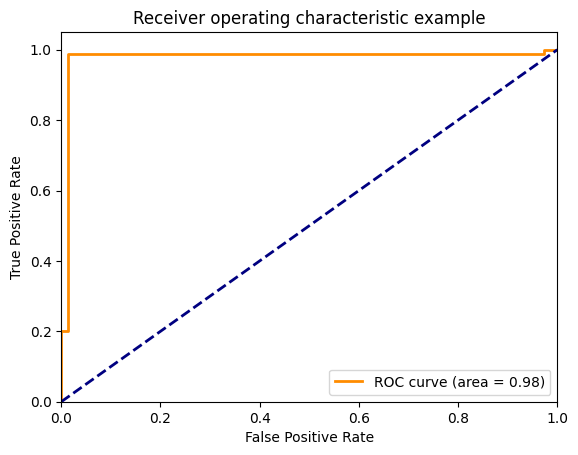

In [12]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_reg.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()